# Load and format data

This notebook loads data from the NOAA GSOD dataset (queried and saved locally using BigQuery api) into Pandas dataframe. I remove columns that are not useful and clean nans. All years are appended and saved out.

It also loads and visualizes the stations for these data. 

The monthly nino 3.4 anomaly since 1950 is loaded into a Pandas dataframe, index by datetime, and saved out.

In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import glob
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import scipy.signal as sig
import time

## Data management

 Load NOAA gsod dataset (temp, precip) (access: https://cloud.google.com/bigquery/public-data/)

In [4]:
dataset_path='./datasets/NOAA_SST/'
fpath = dataset_path + 'noaa_gsod/'
pandas_files = sorted(glob.glob(fpath + 'noaa_gsod.gsod*'))
pandas_files = pandas_files[-5:]  # Take the last five years
print(pandas_files)

['./datasets/NOAA_SST/noaa_gsod\\noaa_gsod.gsod2014', './datasets/NOAA_SST/noaa_gsod\\noaa_gsod.gsod2015', './datasets/NOAA_SST/noaa_gsod\\noaa_gsod.gsod2016', './datasets/NOAA_SST/noaa_gsod\\noaa_gsod.gsod2017', './datasets/NOAA_SST/noaa_gsod\\noaa_gsod.gsod2018']


In [5]:
t0=time.time()
df = pd.DataFrame()
for i, fi in enumerate(pandas_files):
 #   dtmp = pd.read_csv(fi)
    #yr = int(fi[32:36])
    
    dtmp = pd.read_pickle(fi)
    yr = int(fi[-4:])
    
    dtmp['yr'] = yr*np.ones(len(dtmp),).astype(int)
    dtmp = dtmp.drop(columns=['wban', 'dewp', 'count_dewp','count_temp','count_slp','stp','count_stp',\
                      'visib','count_visib','count_wdsp','gust','flag_min','flag_max', \
                      'flag_prcp','sndp','fog','rain_drizzle','snow_ice_pellets','hail',\
                      'thunder','tornado_funnel_cloud'], axis=1)
    
    # convert string values to floats
    dtmp['wdsp'] = dtmp.wdsp.astype(float)
    dtmp['mxpsd'] = dtmp.mxpsd.astype(float)
    
    dtmp = dtmp.replace(to_replace={'temp':9999.9, 'slp':9999.9, 'wdsp':999.9, 'mxpsd':999.9,'max':9999.9,\
                                   'min':9999.9,'prcp':99.99, 'stn':'999999'}, value={'temp':np.nan, 'slp':np.nan, \
                                'wdsp':np.nan, 'mxpsd':np.nan,'max':np.nan,'min':np.nan, 'prcp':0, 'stn':np.nan})
    dtmp = dtmp.dropna()
    
 
    # add datetime
    dtmp['Datetime'] = pd.to_datetime((dtmp['yr'].astype(str) + dtmp['mo'].astype(str) + dtmp['da'].astype(str)),\
                                       format='%Y%m%d')
    df = df.append(dtmp, sort=False)
    print(time.time()-t0)
    
df = df.set_index('Datetime', drop=True)
# this should be commented out df.to_pickle(fpath + 'Combined_noaa_gsod')
print('Time ' + str(time.time()-t0) + ' s')

21.551016092300415
43.32598876953125
66.28445839881897
87.33253574371338
100.71395707130432
Time 101.49394345283508 s


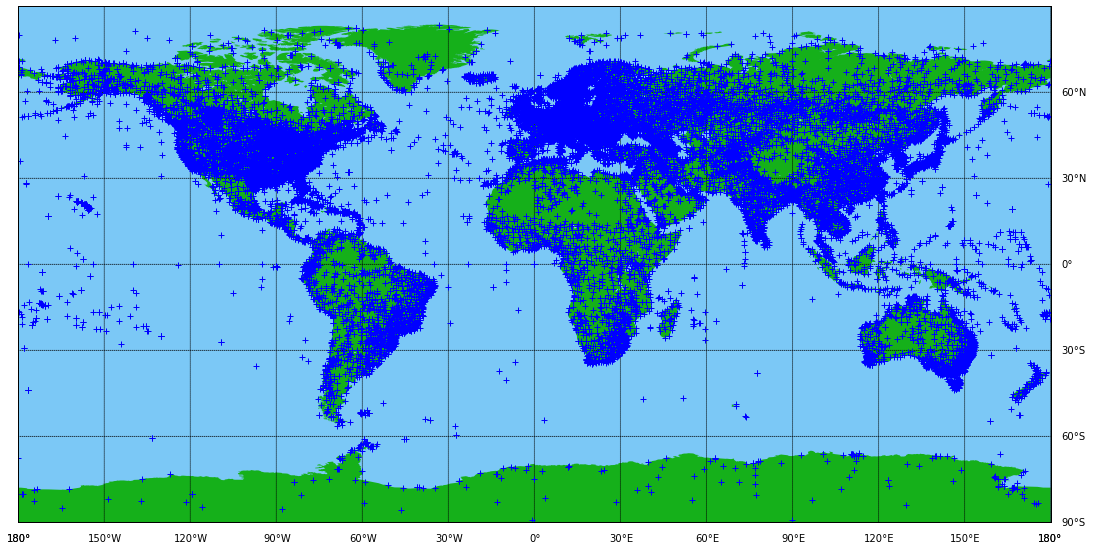

,stn,year,mo,da,temp,slp,wdsp,mxpsd,max,min,prcp,yr
Datetime,,,,,,,,,,,,
2014-08-29,711810,2014,08,29,54.0,1002.7,15.7,20.0,64.2,50.7,0.0,2014
2014-07-13,008418,2014,07,13,85.6,1007.9,3.0,6.0,86.4,85.1,0.0,2014
2014-11-20,262680,2014,11,20,16.9,1037.2,3.4,5.8,24.8,7.7,0.0,2014
2014-04-26,644020,2014,04,26,72.6,1009.9,0.5,1.9,74.7,70.5,0.0,2014
2014-10-20,644540,2014,10,20,79.8,1011.0,3.0,8.0,87.1,71.2,0.0,2014


In [6]:
#df = df.drop(columns='Unnamed: 0')
# get stations 
stations = pd.read_pickle(dataset_path+'noaa_gsod.stations')           
                                      
# View station locations
fig = plt.figure(figsize=(18.5, 10.5))
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180, resolution='l')
m.drawmapboundary(fill_color='xkcd:lightblue')
m.fillcontinents(color='xkcd:green',lake_color='xkcd:lightblue')
m.drawmeridians(np.arange(0.,350.,30.),labels=[True,False,False,True])
m.drawparallels(np.arange(-90.,90,30.),labels=[False,True,True,False])
lon = stations['lon'].tolist()
lat = stations['lat'].tolist()
xpt,ypt = m(lon,lat)
m.plot(xpt,ypt,'b+') 
plt.show()

df.head()